# EDA on News Headline Dataset

In [ ]:
# numpy module for numeric data processing and vectorization
import numpy as np

# pandas module for opening dataset & processing it
import pandas as pd

# for text cleaning purposes
import re, string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



# to fix random seeds 
import os
import random

# for making progress bar
from tqdm.notebook import tqdm

# for making plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# for making word cloud
from wordcloud import WordCloud, STOPWORDS

# evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# keras for deep learning model creation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.utils import plot_model

# other modules
import tensorflow as tf
import torch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
plt.style.use('ggplot')
df = pd.read_json("/content/drive/MyDrive/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


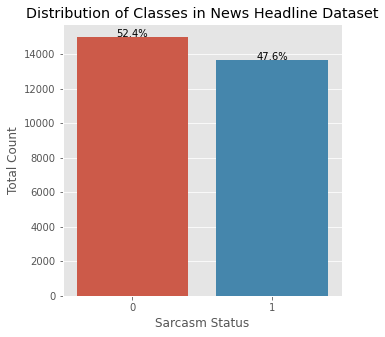

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(df.is_sarcastic)
ax.set(title = "Distribution of Classes in News Headline Dataset", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

In [ ]:
stopwd = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stopwd.update(punctuation)

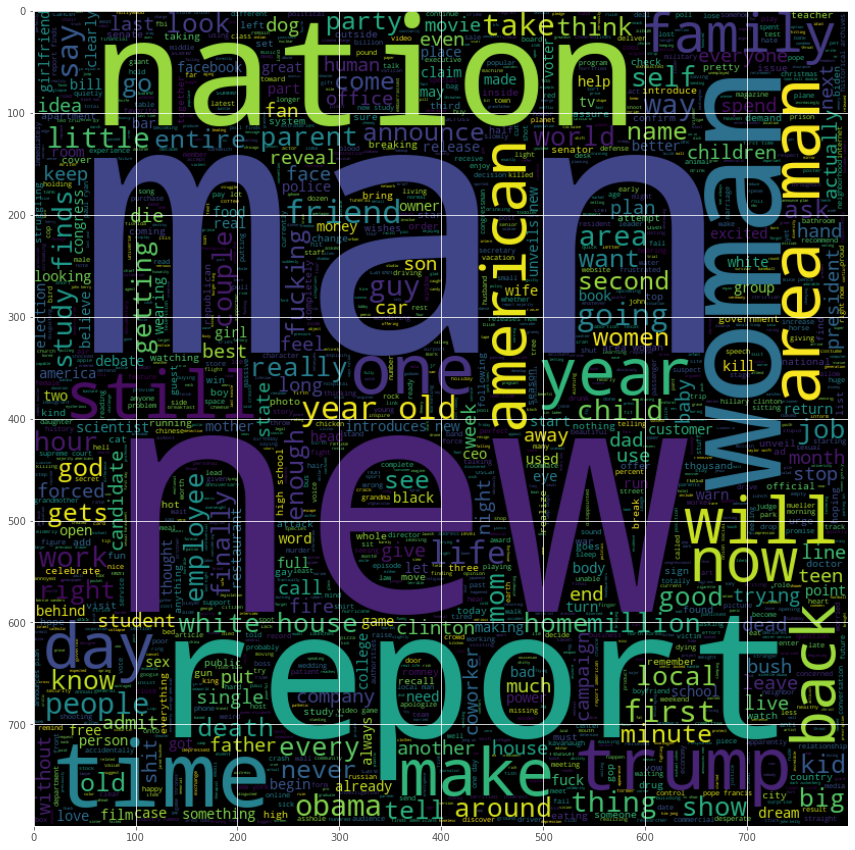

In [ ]:
plt.figure(figsize = (15,15)) # non-sarcastic words wordcloud
wordcld = WordCloud(max_words = 3000 , width = 800 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wordcld , interpolation = 'bilinear')